In [4]:
# reload automatically the modules when they change
%load_ext autoreload
%autoreload 2

# add the current directory to the python search path
import sys
sys.path.insert(0, ".")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from scipy import signal
import numpy as np
import pandas as pd
from src.plot_raw import plot_raw
from matplotlib import pyplot as plt

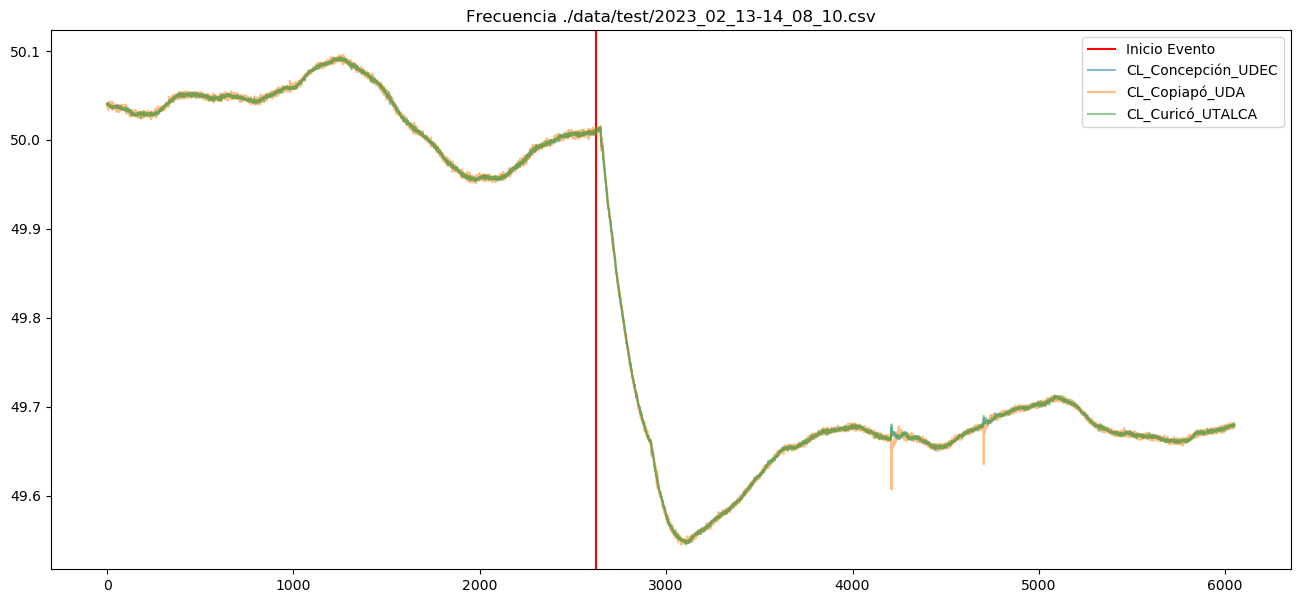

In [6]:
## Ejemplo uso plot_raw

input_path = "./data/test/2023_02_13-14_08_10.csv"
fig = plot_raw(input_path)

In [41]:
## EJemplo uso scipy.optimize.differential_evolution y plot_result
from src.sampler import sampler
from scipy.optimize import differential_evolution
from src.objective_function import objective_function

input_path = "./data/raw/2021_set_n1/2021_05_02-16_44_00.csv"

model = 1
Ts = 0.3
df = sampler(input_path, Ts, event_time=25)
P0 = df["power"][0] / 1000


event_freq = df["freq"][df["event"]==1].to_numpy()

bounds = [(0.00001, 1000) for i in range(6)]
arguments = (model, Ts, P0, event_freq)
result = differential_evolution(objective_function, bounds, args=(arguments,))

result

 message: Optimization terminated successfully.
 success: True
     fun: 0.03958052672009892
       x: [ 2.248e+00  1.000e-05  9.190e+02  7.098e+00  7.732e+02
            1.000e-05]
     nit: 99
    nfev: 9049
     jac: [ 0.000e+00  1.009e-03  0.000e+00  0.000e+00 -6.061e-06
            2.065e-02]

[autoreload of src.plot_result failed: Traceback (most recent call last):
  File "/home/jose/.local/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/home/jose/.local/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 848, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/jose/Desktop/USACH/2023_I/Electrica/Differential-Evolution-Frequency-Model-Fitting/./src/plot_result.py", line 10, in <module>
    from objective_function import modelo_1
ModuleNotFoundError: No module named 'objective_function'
]


Text(0.5, 1.0, './data/raw/2021_set_n1/2021_05_02-16_44_00.csv')

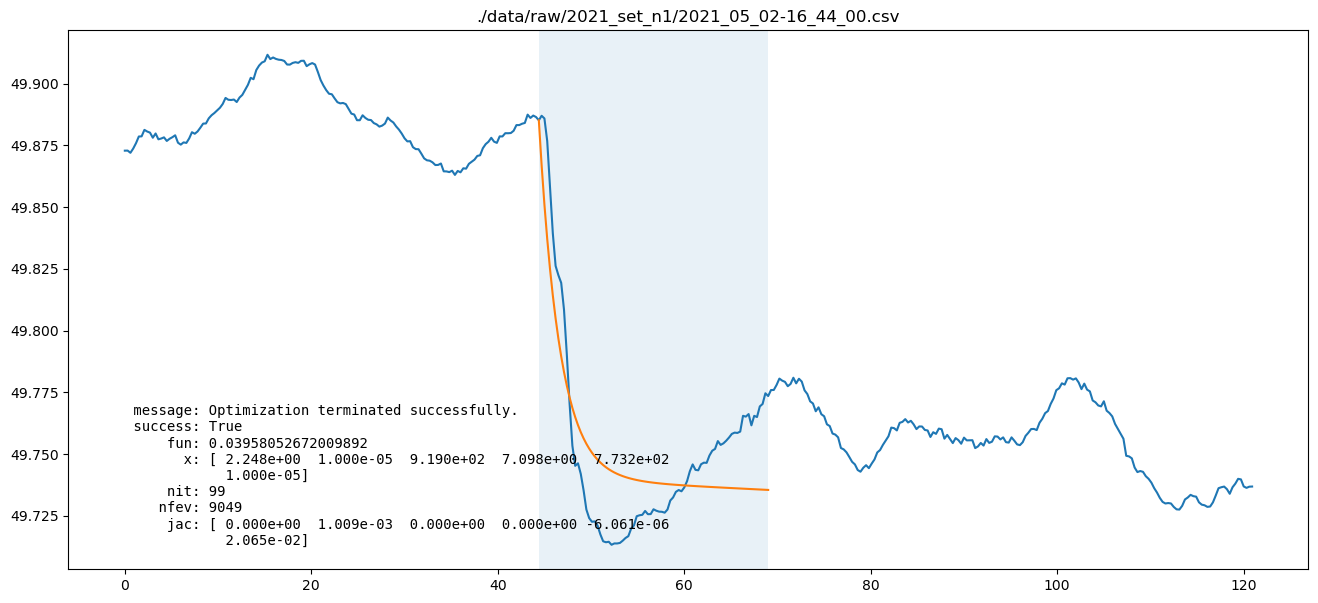

In [69]:
from src.plot_result import plot_result
fig = plot_result(df, arguments, result.x)
plt.text(0, min(event_freq), repr(result), fontsize=10, fontfamily='monospace' )
plt.title(input_path)

In [63]:
ax = fig.

In [10]:
# Ejemplo uso objective_function
from src.objective_function import objective_function

Kd = 1.479
K = 5.105
Ta = 0.0001
Tb = 0.0001
Tc = 7.652
Td = 1.977
params = [Ta,Tb,Tc,Td,K,Kd]

model =1
Ts = 0.1

input_path = "./data/test/2023_02_13-14_08_10_Sampling_100ms.csv"
df = pd.read_csv(input_path)
event_freq = df["Frecuencia [Hz]"][df["Evento"]==1].to_numpy()

P0 = df["Potencia [MW]"][0]/1000

args = (model, Ts, P0, event_freq)

objective_function(params, args)

428159.742116734


428159.742116734